Team Members names:
- Ranjitha Durgasi
- Nikhitha Reddy Nallanagula
- Harshitha Korapati Murali
- Harshitha Ettam
- Dhawalshree Ashok Mengane



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Ratings distribution

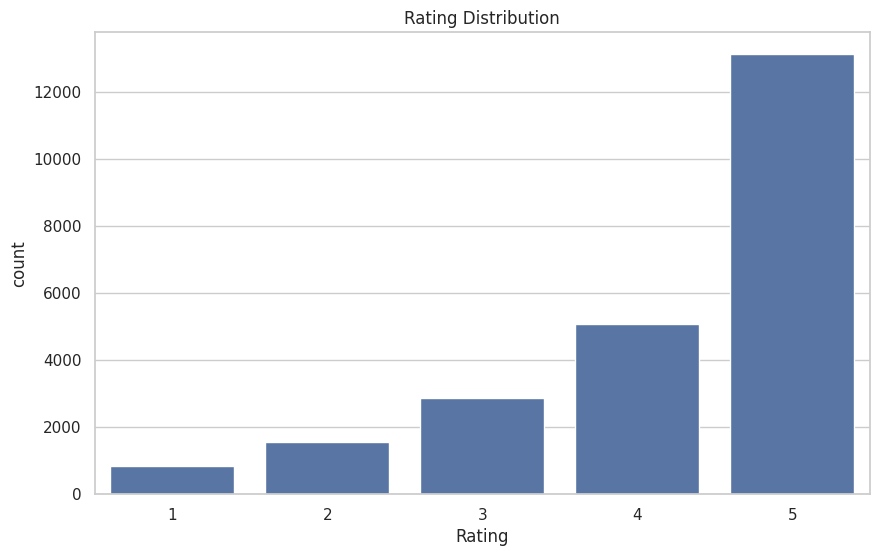

In [ ]:
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.show()

## Recommendation percentage

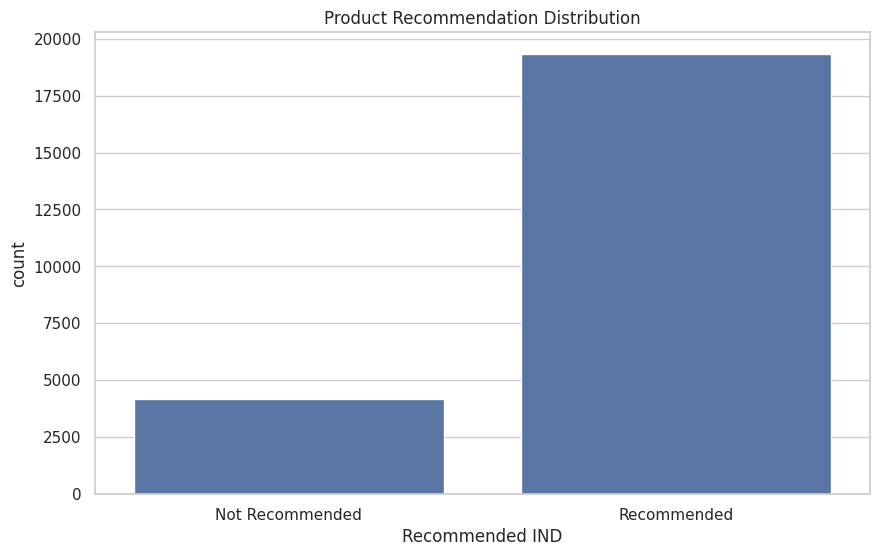

In [ ]:
sns.countplot(x='Recommended IND', data=df)
plt.title('Product Recommendation Distribution')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

## Most common clothing categories

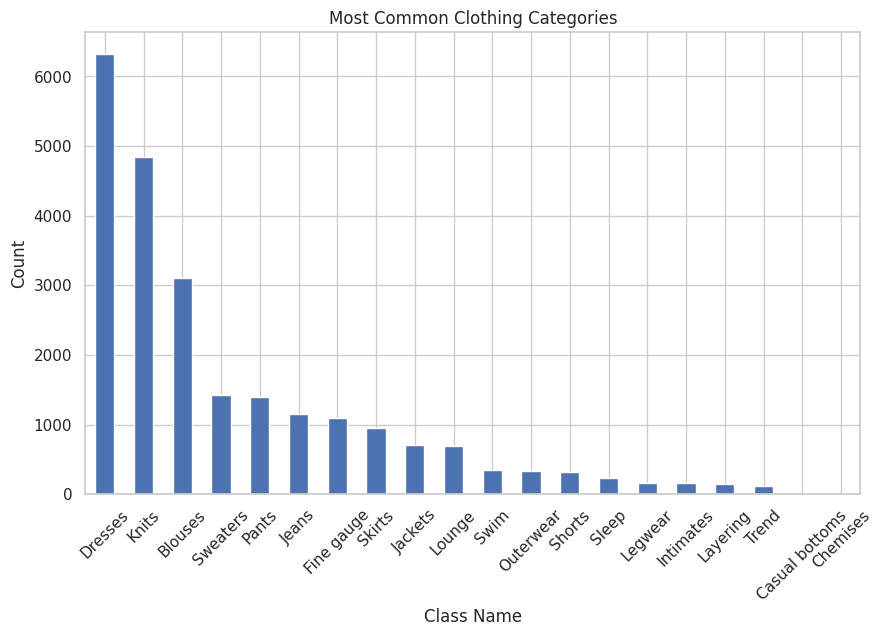

In [ ]:
df['Class Name'].value_counts().plot(kind='bar')
plt.title('Most Common Clothing Categories')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Age distribution

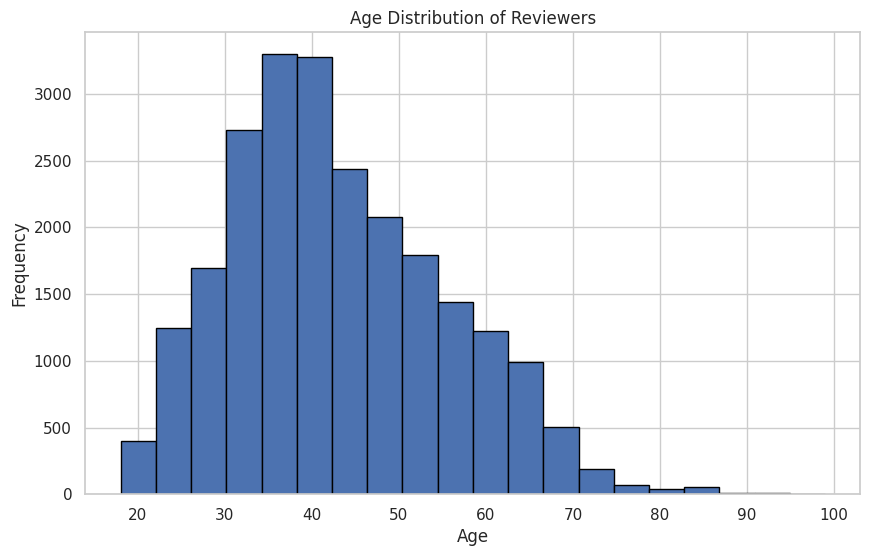

In [ ]:
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.show()

## Reviews per Department

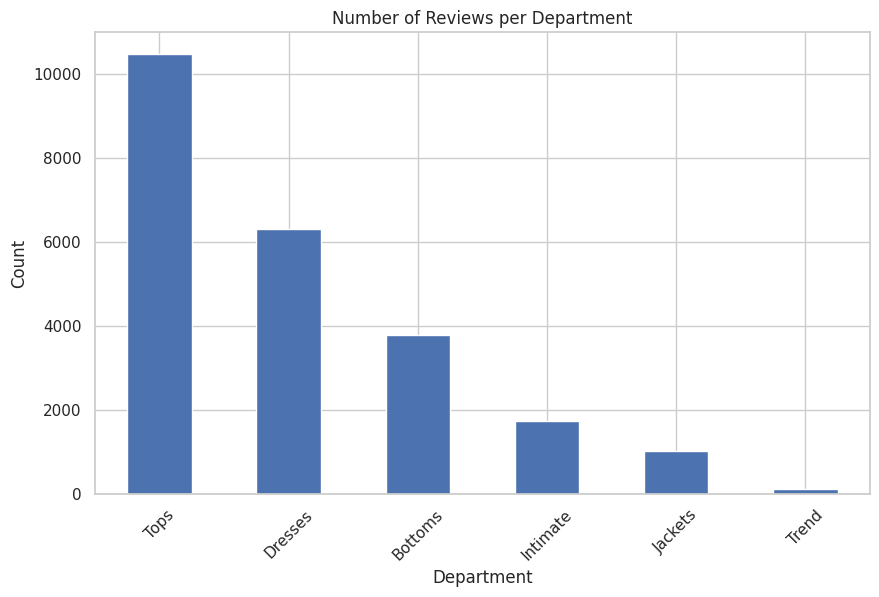

In [ ]:
df['Department Name'].value_counts().plot(kind='bar')
plt.title('Number of Reviews per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Top 10 most reviewed clothing items

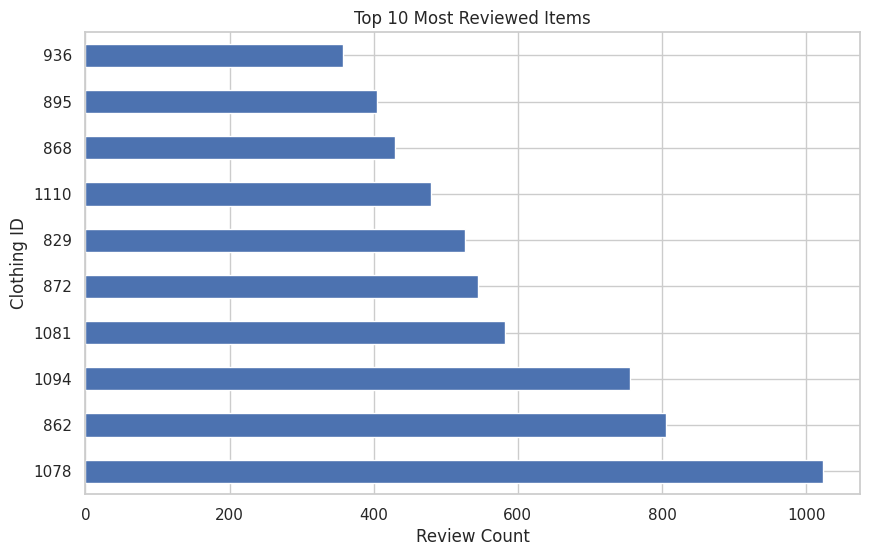

In [ ]:
top_items = df['Clothing ID'].value_counts().head(10)
top_items.plot(kind='barh')
plt.title('Top 10 Most Reviewed Items')
plt.xlabel('Review Count')
plt.ylabel('Clothing ID')
plt.show()

## Positive feedback distribution

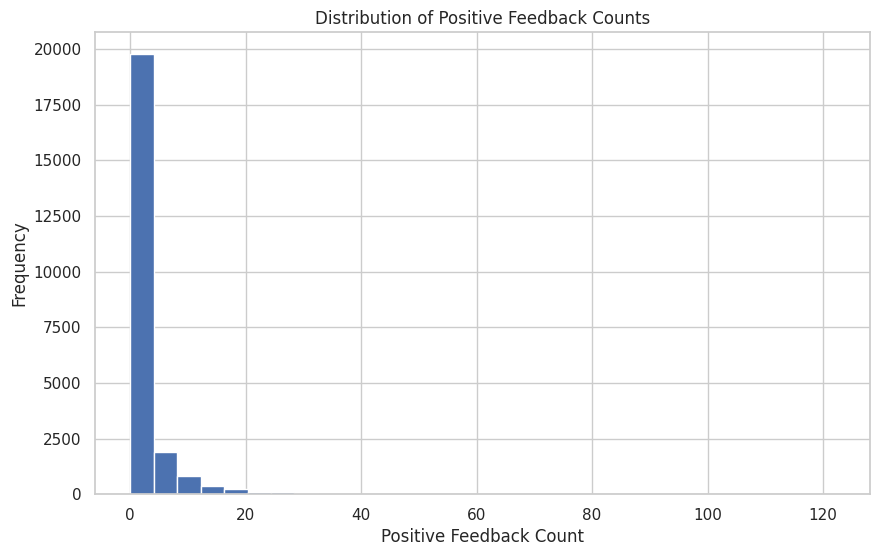

In [ ]:
df['Positive Feedback Count'].plot(kind='hist', bins=30)
plt.title('Distribution of Positive Feedback Counts')
plt.xlabel('Positive Feedback Count')
plt.show()

## Average rating per class


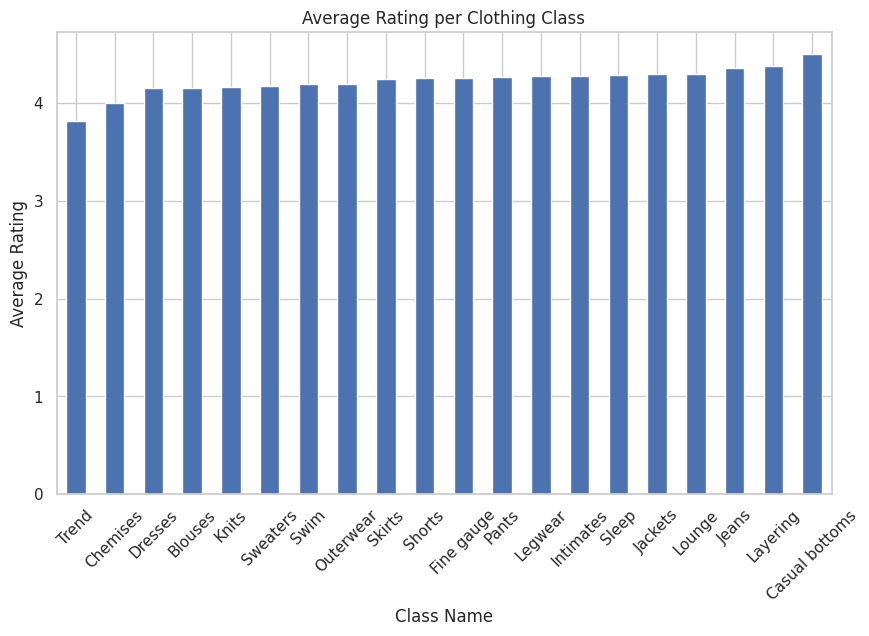

In [ ]:
df.groupby('Class Name')['Rating'].mean().sort_values().plot(kind='bar')
plt.title('Average Rating per Clothing Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

## Recommendation by age group

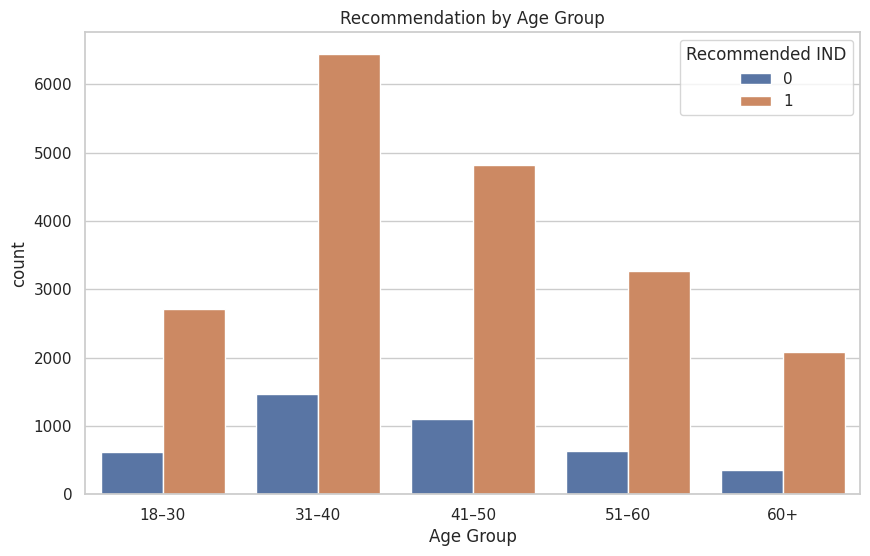

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30','31–40','41–50','51–60','60+'])
sns.countplot(x='Age Group', hue='Recommended IND', data=df)
plt.title('Recommendation by Age Group')
plt.show()

## Longest reviews by class

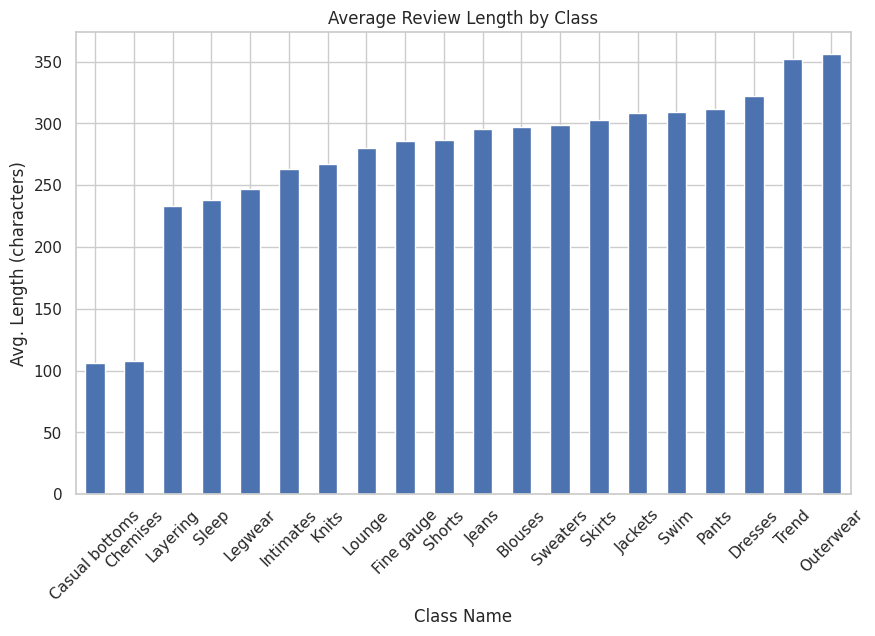

In [ ]:
df['Review Length'] = df['Review Text'].fillna('').apply(len)
df.groupby('Class Name')['Review Length'].mean().sort_values().plot(kind='bar')
plt.title('Average Review Length by Class')
plt.ylabel('Avg. Length (characters)')
plt.xticks(rotation=45)
plt.show()

## Average rating per department

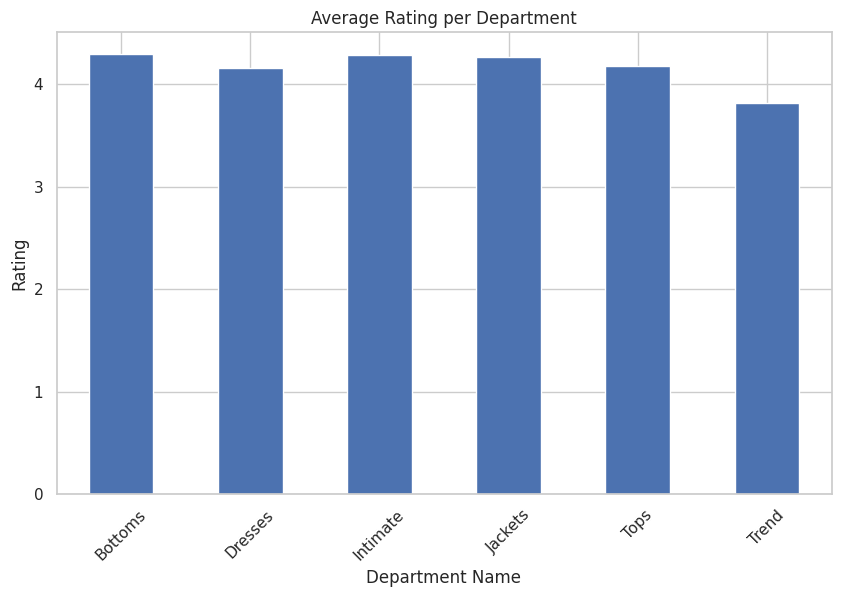

In [ ]:
df.groupby('Department Name')['Rating'].mean().plot(kind='bar')
plt.title('Average Rating per Department')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

## Correlation heatmap

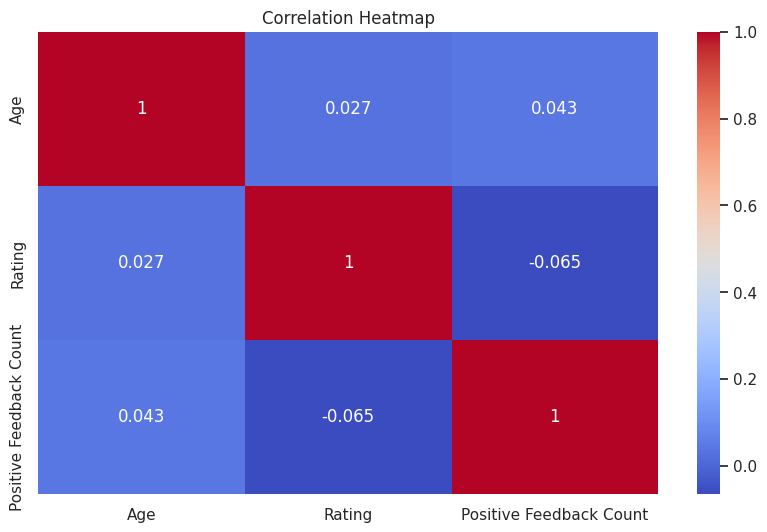

In [ ]:
sns.heatmap(df[['Age','Rating','Positive Feedback Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Word cloud for 5-star and 1-star reviews

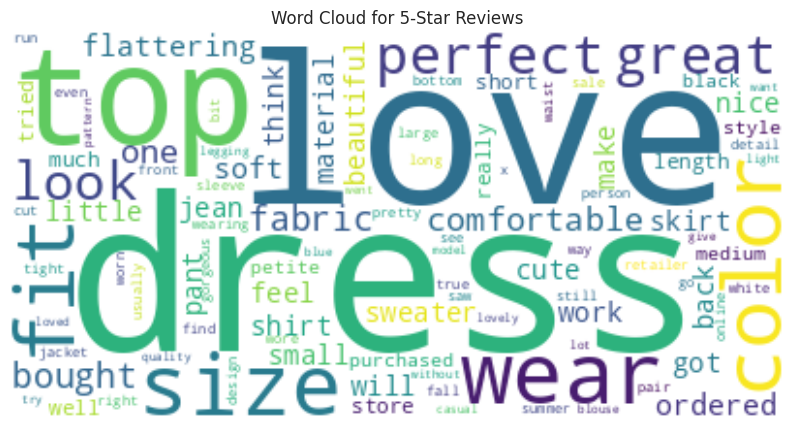

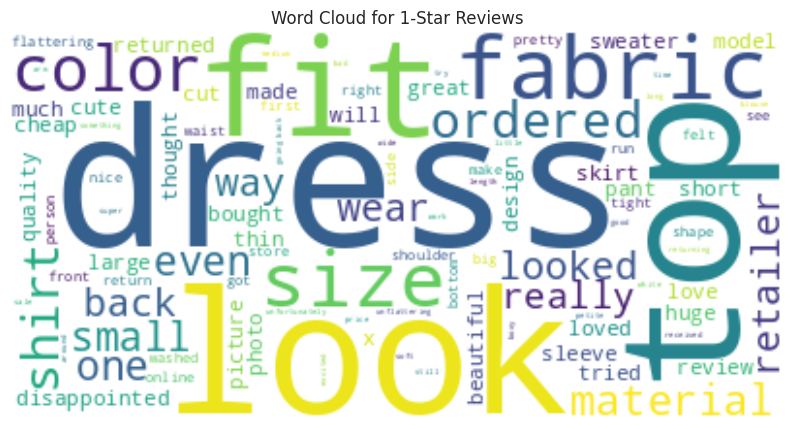

In [ ]:
for rating in [5, 1]:
    text = " ".join(df[df['Rating'] == rating]['Review Text'].dropna())
    wc = WordCloud(background_color='white', max_words=100).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {rating}-Star Reviews')
    plt.show()

## Review length vs rating

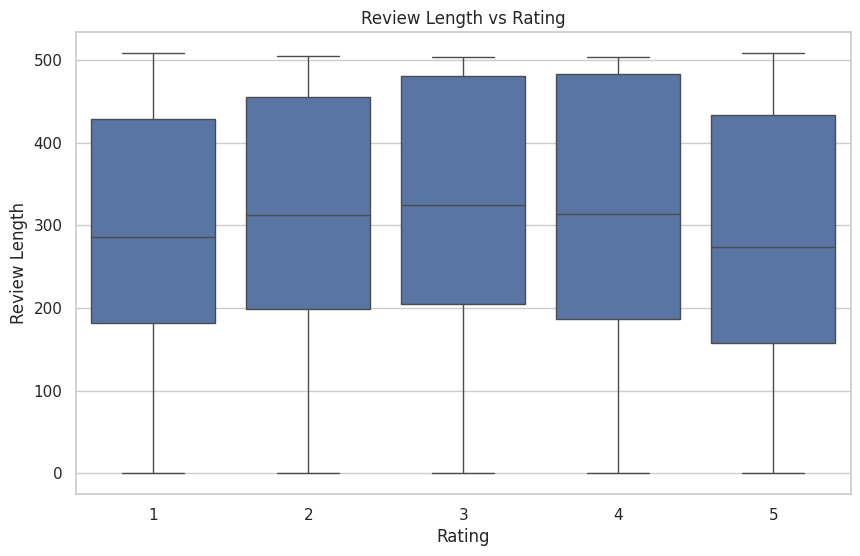

In [ ]:
sns.boxplot(x='Rating', y='Review Length', data=df)
plt.title('Review Length vs Rating')
plt.show()

## Age vs rating

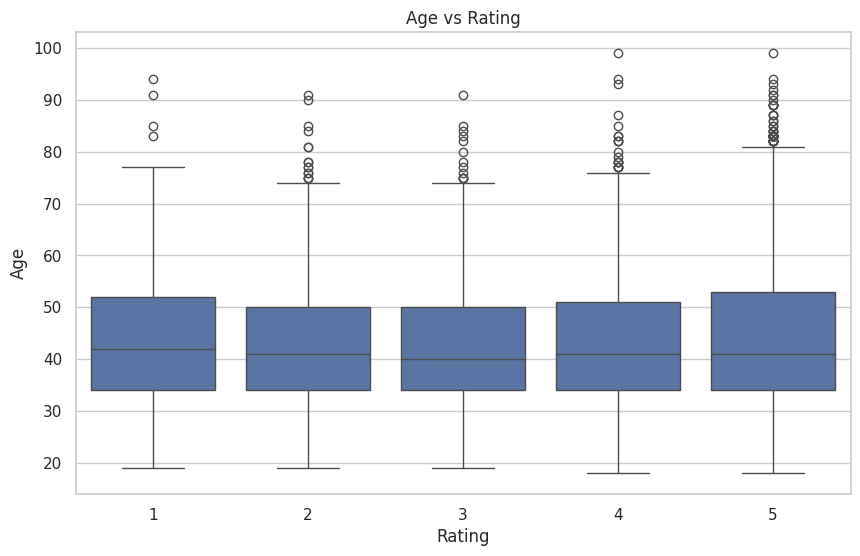

In [ ]:
sns.boxplot(x='Rating', y='Age', data=df)
plt.title('Age vs Rating')
plt.show()

## Avg positive feedback per department

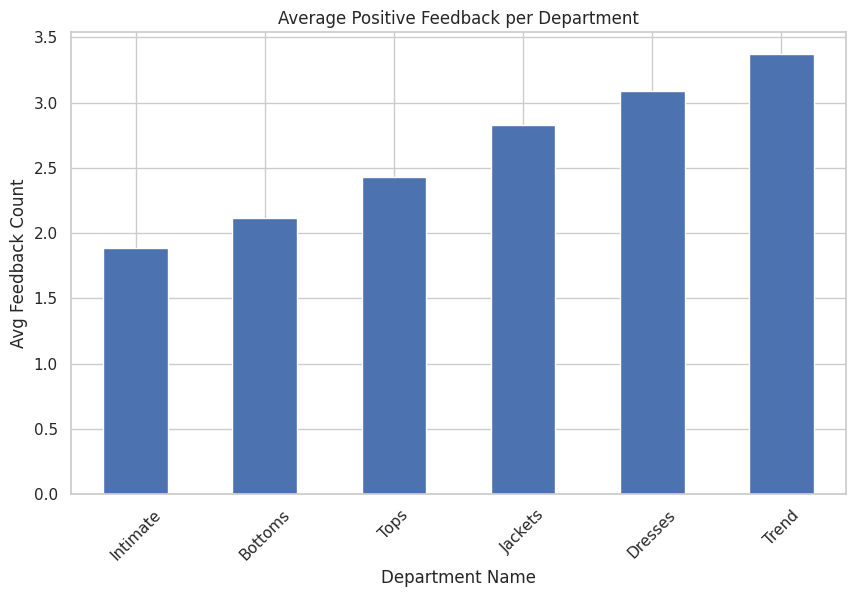

In [ ]:
df.groupby('Department Name')['Positive Feedback Count'].mean().sort_values().plot(kind='bar')
plt.title('Average Positive Feedback per Department')
plt.ylabel('Avg Feedback Count')
plt.xticks(rotation=45)
plt.show()

## Rating vs recommendation

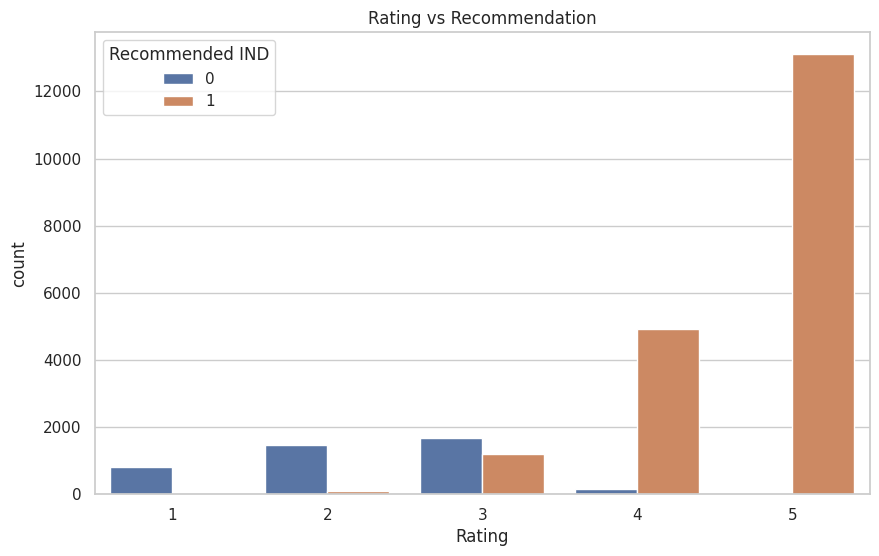

In [ ]:
sns.countplot(x='Rating', hue='Recommended IND', data=df)
plt.title('Rating vs Recommendation')
plt.show()

## Top 5 highest and lowest recommended classes

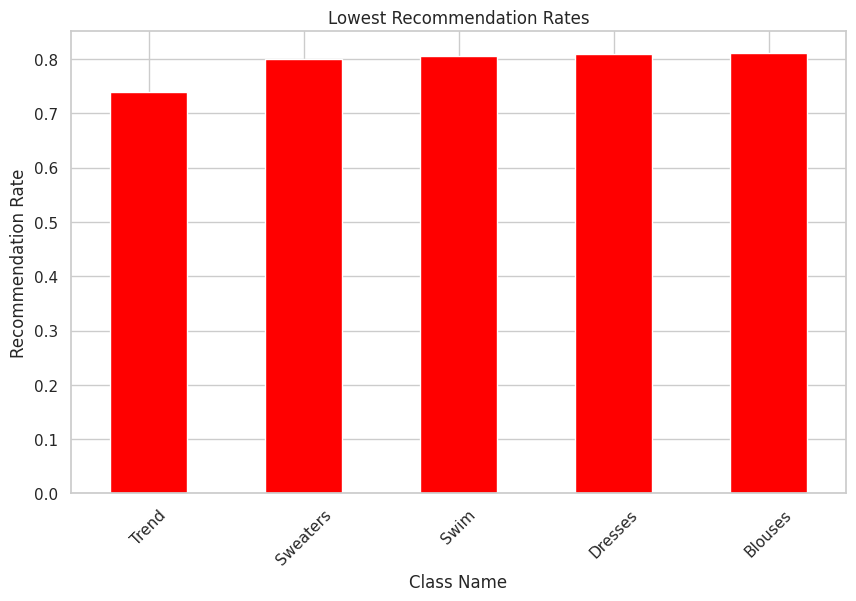

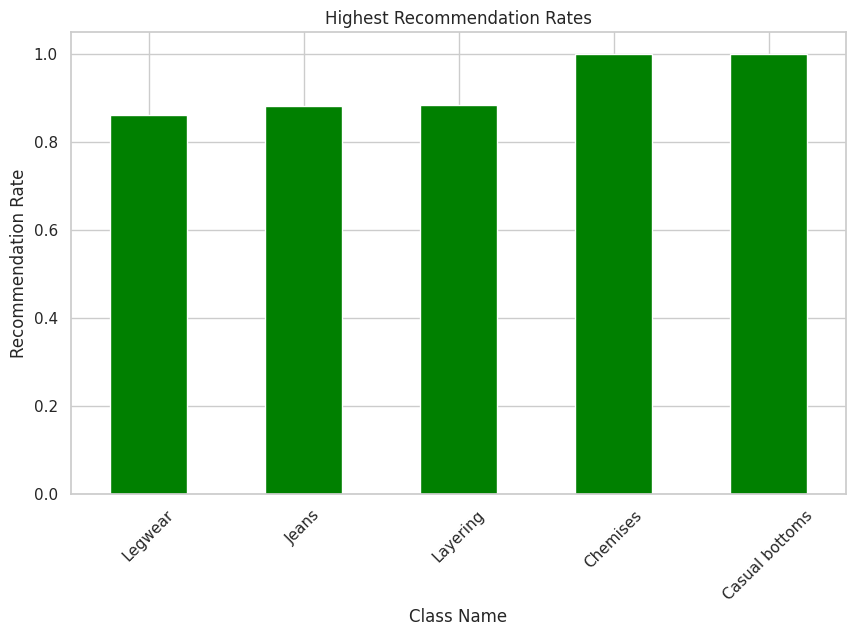

In [ ]:
class_recommend = df.groupby('Class Name')['Recommended IND'].mean().sort_values()
class_recommend.head(5).plot(kind='bar', color='red', title='Lowest Recommendation Rates')
plt.ylabel('Recommendation Rate')
plt.xticks(rotation=45)
plt.show()
class_recommend.tail(5).plot(kind='bar', color='green', title='Highest Recommendation Rates')
plt.ylabel('Recommendation Rate')
plt.xticks(rotation=45)
plt.show()

## Frequent review titles in 5-star

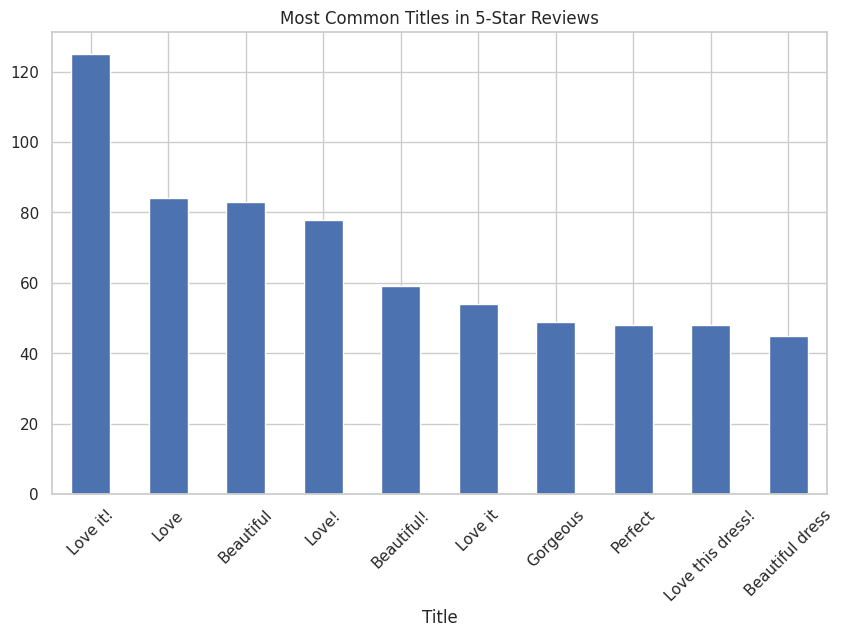

In [ ]:
df[df['Rating'] == 5]['Title'].value_counts().head(10).plot(kind='bar')
plt.title('Most Common Titles in 5-Star Reviews')
plt.xticks(rotation=45)
plt.show()

## Scatter of Age vs Feedback vs Rating

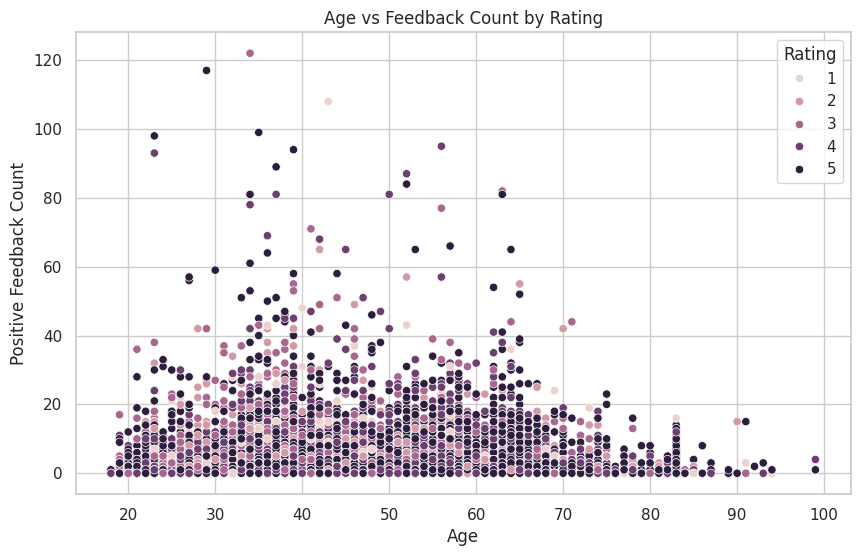

In [ ]:
sns.scatterplot(x='Age', y='Positive Feedback Count', hue='Rating', data=df)
plt.title('Age vs Feedback Count by Rating')
plt.show()

## Negative words in 1-star reviews

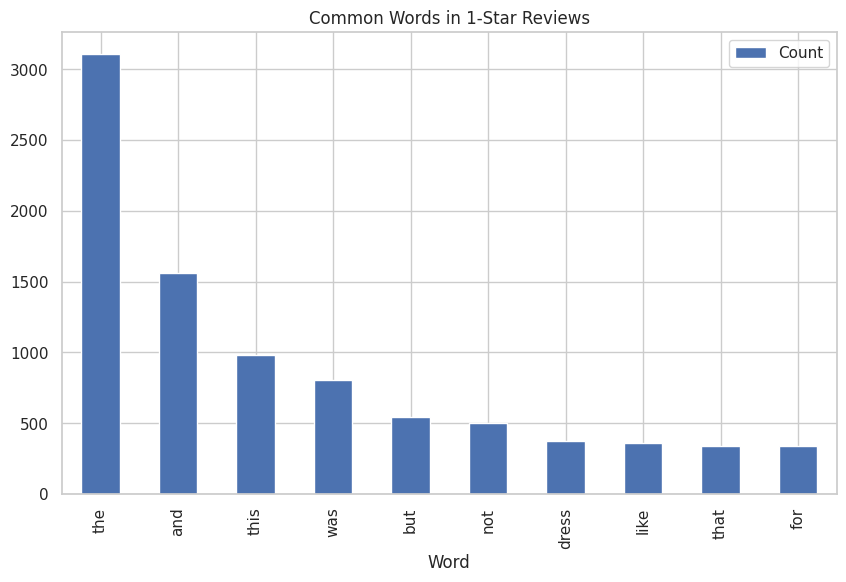

In [ ]:
from collections import Counter
import re
text = " ".join(df[df['Rating'] == 1]['Review Text'].dropna()).lower()
words = re.findall(r'\b[a-z]{3,}\b', text)
common_words = Counter(words).most_common(10)
pd.DataFrame(common_words, columns=['Word', 'Count']).plot(x='Word', y='Count', kind='bar')
plt.title('Common Words in 1-Star Reviews')
plt.show()

## Feedback count skewness

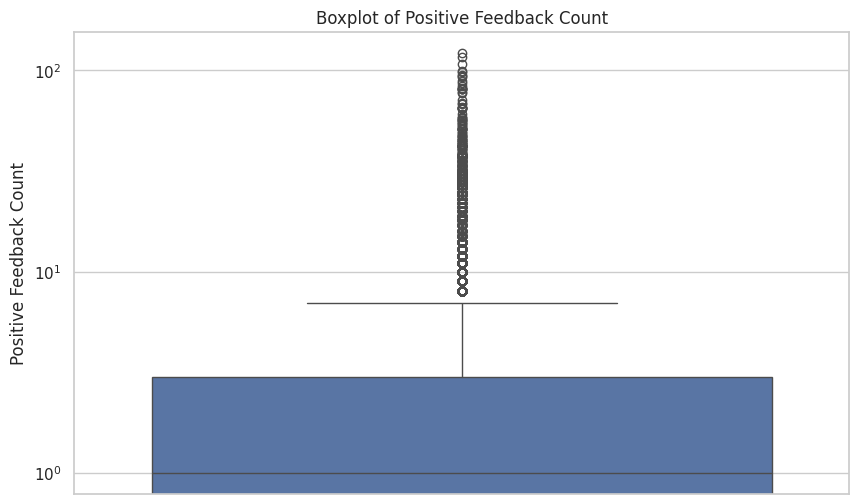

In [ ]:
sns.boxplot(y='Positive Feedback Count', data=df)
plt.title('Boxplot of Positive Feedback Count')
plt.yscale('log')
plt.show()

## Review count vs rating for items

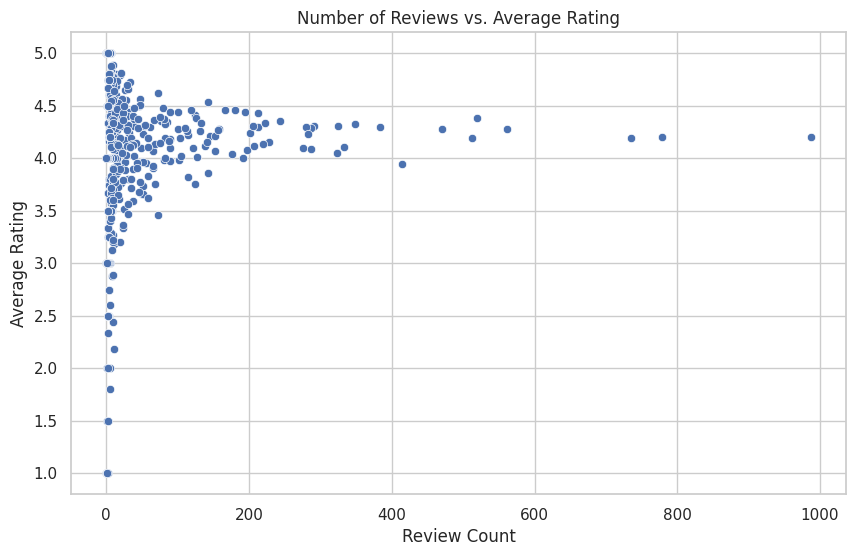

In [ ]:
item_reviews = df.groupby('Clothing ID').agg({'Rating': 'mean', 'Review Text': 'count'})
sns.scatterplot(x='Review Text', y='Rating', data=item_reviews)
plt.title('Number of Reviews vs. Average Rating')
plt.xlabel('Review Count')
plt.ylabel('Average Rating')
plt.show()

## Simple decision rule example (pseudo-tree logic)

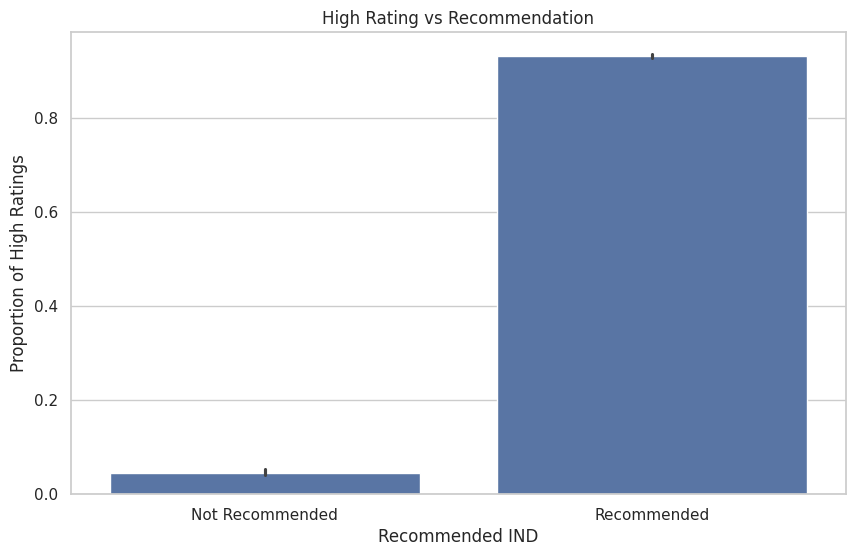

In [ ]:
df['High Rating'] = df['Rating'] >= 4
sns.barplot(x='Recommended IND', y='High Rating', data=df)
plt.title('High Rating vs Recommendation')
plt.ylabel('Proportion of High Ratings')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

## Which Age Groups Tend to Leave the Longest Reviews?

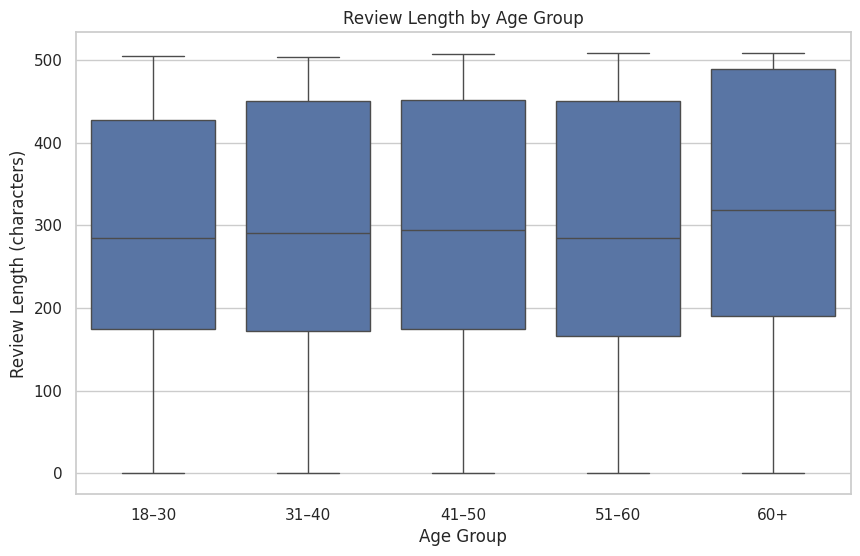

In [ ]:
sns.boxplot(x='Age Group', y='Review Length', data=df)
plt.title('Review Length by Age Group')
plt.ylabel('Review Length (characters)')
plt.xlabel('Age Group')
plt.show()

## What Are the Most Loved & Most Criticized Clothing Classes?

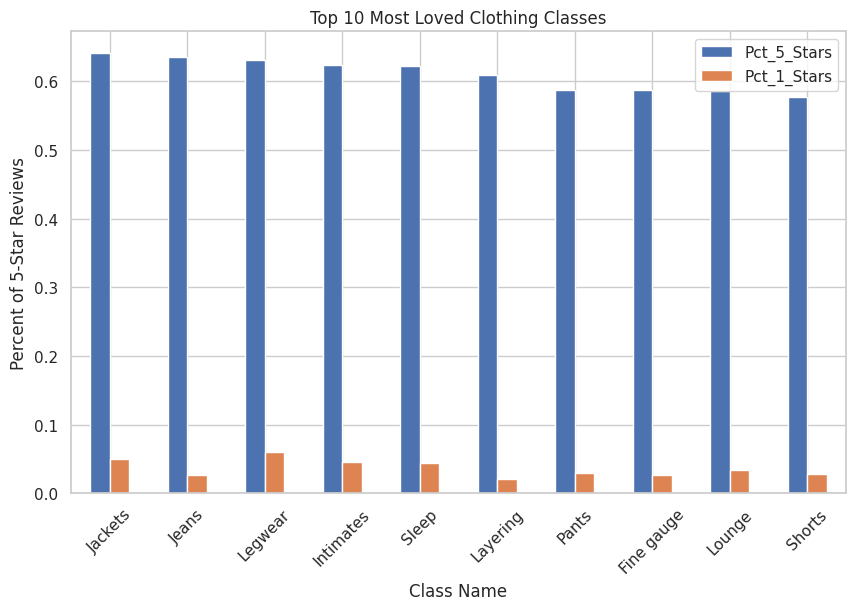

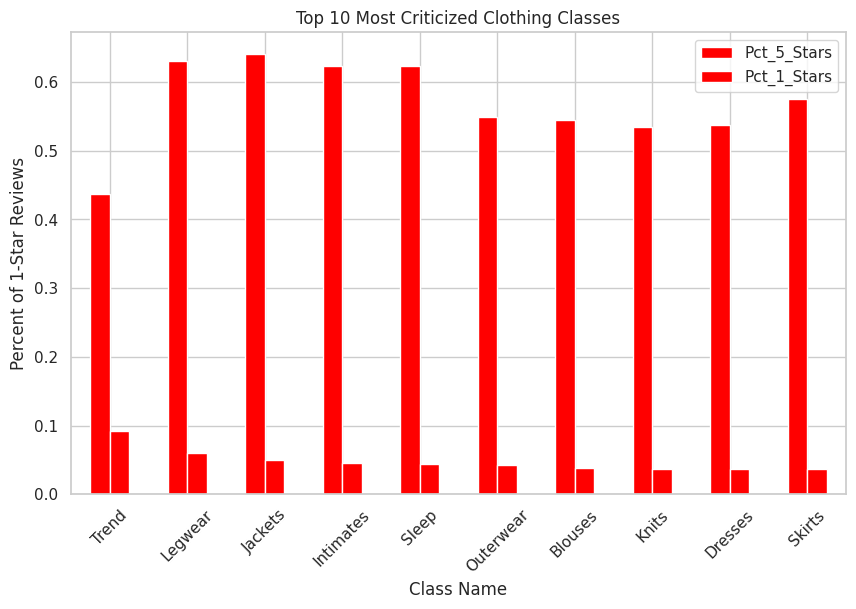

In [ ]:
class_sentiment = df.pivot_table(index='Class Name',
                                 values='Rating',
                                 aggfunc=[lambda x: (x==5).mean(), lambda x: (x==1).mean()])
class_sentiment.columns = ['Pct_5_Stars', 'Pct_1_Stars']
class_sentiment.sort_values(by='Pct_5_Stars', ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Most Loved Clothing Classes')
plt.ylabel('Percent of 5-Star Reviews')
plt.xticks(rotation=45)
plt.show()

class_sentiment.sort_values(by='Pct_1_Stars', ascending=False).head(10).plot(kind='bar', color='red')
plt.title('Top 10 Most Criticized Clothing Classes')
plt.ylabel('Percent of 1-Star Reviews')
plt.xticks(rotation=45)
plt.show()

## What’s the Sentiment Polarity of Review Texts Across Ratings?

<ipython-input-32-583743bb826c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Text'].fillna('', inplace=True)


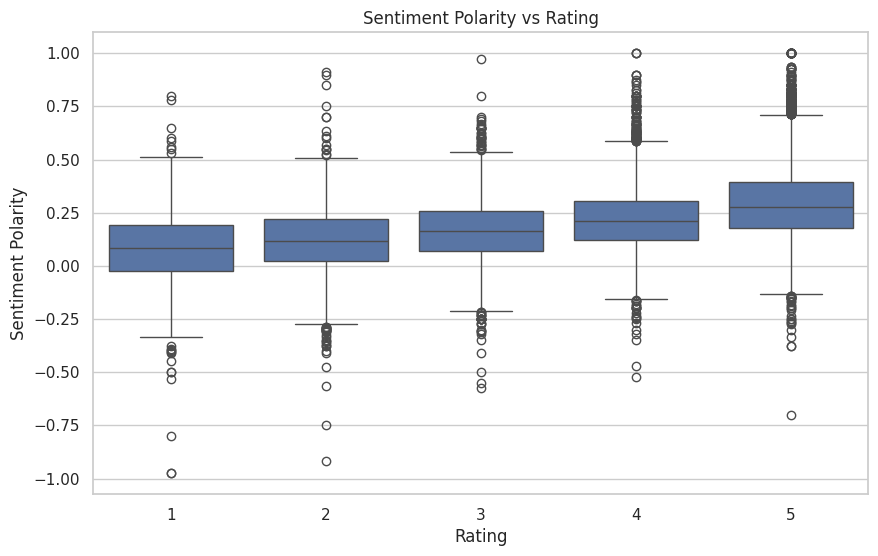

In [ ]:
from textblob import TextBlob

df['Review Text'].fillna('', inplace=True)
df['Sentiment Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.boxplot(x='Rating', y='Sentiment Polarity', data=df)
plt.title('Sentiment Polarity vs Rating')
plt.show()

## Predictive Visual: Can Feedback Count Predict Recommendation?

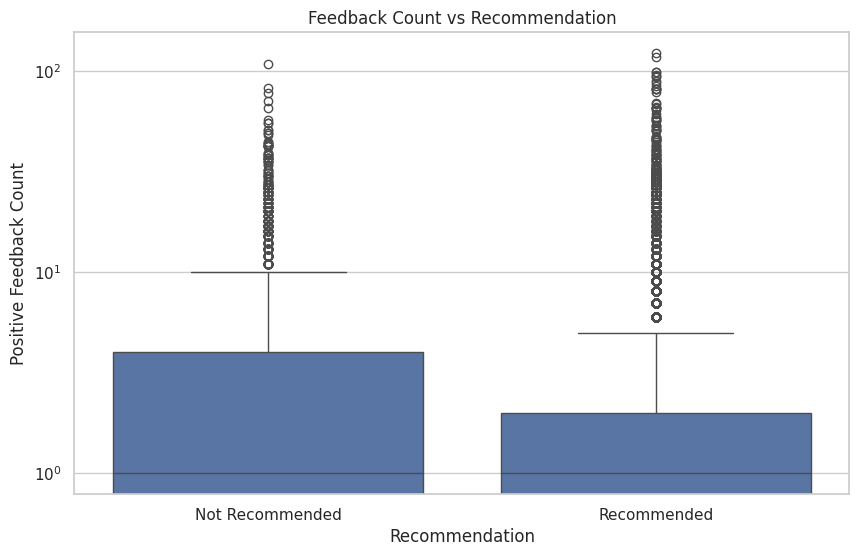

In [ ]:
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=df)
plt.title('Feedback Count vs Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Positive Feedback Count')
plt.yscale('log')
plt.xticks([0,1], ['Not Recommended', 'Recommended'])
plt.show()

## Heatmap of Rating by Department vs Class (Pivot View)

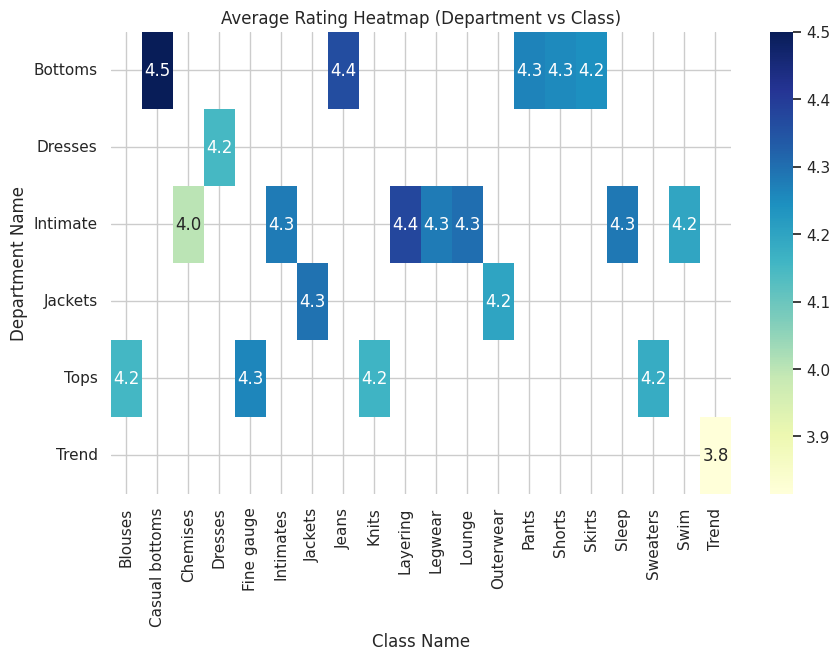

In [ ]:
pivot_rating = df.pivot_table(index='Department Name', columns='Class Name', values='Rating', aggfunc='mean')
sns.heatmap(pivot_rating, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Rating Heatmap (Department vs Class)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()